In [1]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

* explore dataframe

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Spending Score (1-100),0,0.0
Annual Income (k$),0,0.0
Age,0,0.0
Genre,0,0.0
CustomerID,0,0.0


In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df['is_male'] = 1
for i in range(len(df)):
    if df.loc[i,'Genre'] == 'Female' :
        df.loc[i,'is_male'] = 0

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),is_male
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


## Objective: 
- Fit K-Means, 
- find optimal number of clusters using elbow rule, 
- and plot clusters.

To simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset. There are ways to lower the dimension of your data so it can plotted in two dimensions and we will get to those in the beginning of next week.

We shouldn't forget to scale the data using some technique from sklearn, even though, it's **not a must** in the case because we take only the last two columns and they have similar scale.

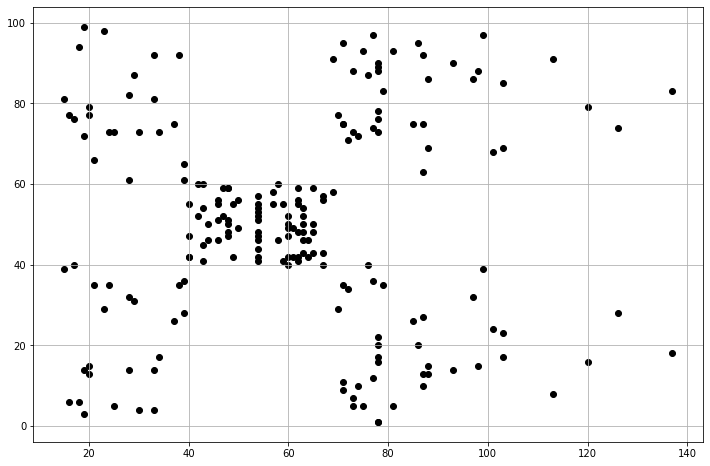

In [7]:
plt.scatter(df['Annual Income (k$)'],
           df['Spending Score (1-100)'],
           c='black',
           marker='o')
plt.grid()
plt.show()

In [38]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
df_scaled = pd.DataFrame(scaller.fit_transform(df[['Age',"Annual Income (k$)",'Spending Score (1-100)','is_male']].astype(float)))

In [41]:
df_scaled.columns = ['Age',"Annual Income (k$)",'Spending Score (1-100)','is_male']
df_scaled

,Age,Annual Income (k$),Spending Score (1-100),is_male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


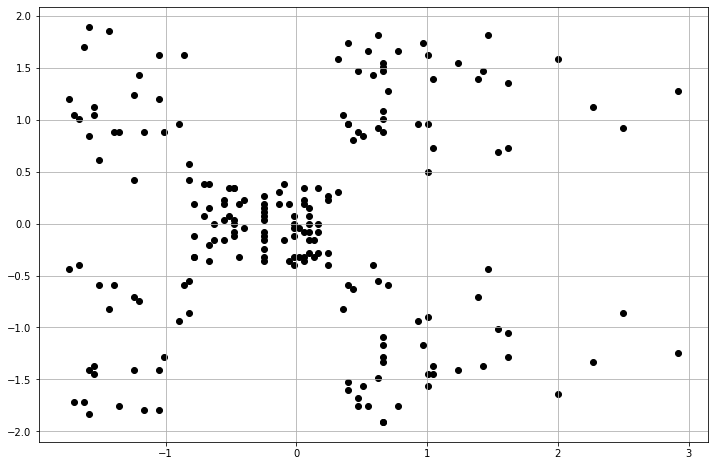

In [42]:
plt.scatter(df_scaled['Annual Income (k$)'],
           df_scaled['Spending Score (1-100)'],
           c='black',
           marker='o')
plt.grid()
plt.show()

In [43]:
# elbow rule
X = df_scaled
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

* fit model with optimal number of clusters

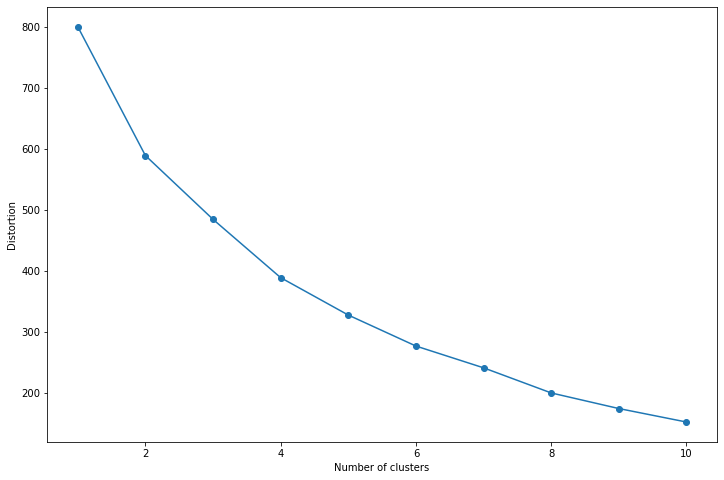

In [44]:
plot_distortion(X,max_clusters=10)

* define function plot_clusters

In [75]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    for cluster in set(y_res):
        x = []
        y = []
        for i in range(len(X)):
            if y_res[i] == cluster:
                x.append(X.loc[i,'Annual Income (k$)'])
                y.append(X.loc[i,'Spending Score (1-100)'])
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

* plot clusters

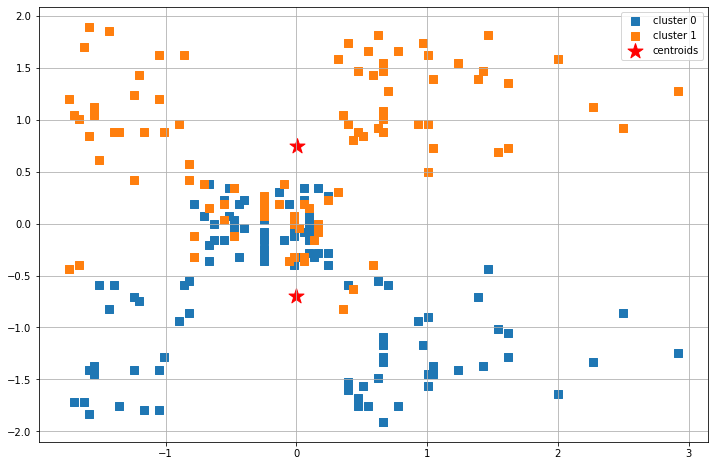

In [80]:
km = KMeans(n_clusters=2,
           n_init=20,
           random_state=0)
y_km = km.fit_predict(X)
plot_clusters(X, y_km, plt_cluster_centers= True)